In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

C:\Users\camij\AppData\Local\Temp\ipykernel_25944\3289979168.py:6: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", c = 'blue', facecolors='none',lw=3)


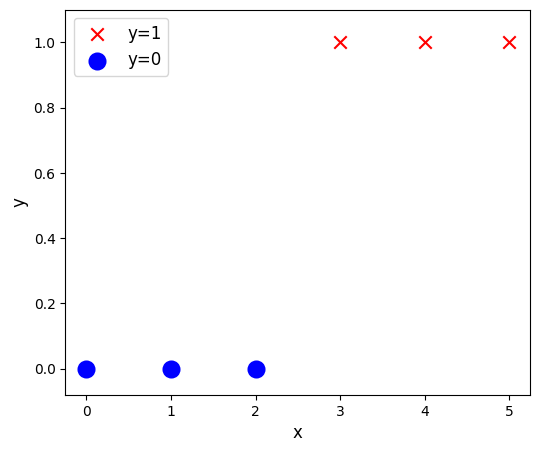

In [24]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(6,5))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", c = 'blue', facecolors='none',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [11]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

C:\Users\camij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
logistic_layer = model.get_layer('L1')

In [22]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [23]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = 1.0 / (1.0+ np.exp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b))
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.01098694]]
[[0.98901306]]


In [64]:
norm_l = tf.keras.layers.Normalization(axis=-1)

In [65]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )    
    g = 1.0/(1.0+np.exp(-z))

    return g

In [ ]:
# Forward prop from scratch

def dense(a_in, W, b):
    """
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):               
        w = W[:,j]                                    
        z = np.dot(w, a_in) + b[j]         
        a_out[j] = sigmoid(z)
    return(a_out)

In [67]:
def sequential(x, W1, b1, W2, b2):
    a1 = dense(x,  W1, b1)
    a2 = dense(a1, W2, b2)
    return(a2)

In [68]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [69]:
def predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequential(X[i], W1, b1, W2, b2)
    return(p)

In [70]:
X_tst = np.array([
    [200,13.9],  
    [200,17]])   

In [71]:
norm_l.adapt(X_tst)

In [72]:
X_tstn = norm_l(X_tst)
predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

C:\Users\camij\AppData\Local\Temp\ipykernel_25944\2240904438.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = sequential(X[i], W1, b1, W2, b2)


In [73]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


In [92]:
from sklearn.datasets import make_blobs
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [97]:
# make 4-class dataset for classification
classes = 5
m = 200
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2], [2, 4]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [115]:
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)

def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    color=map(col), 
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=50, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    plt.show()

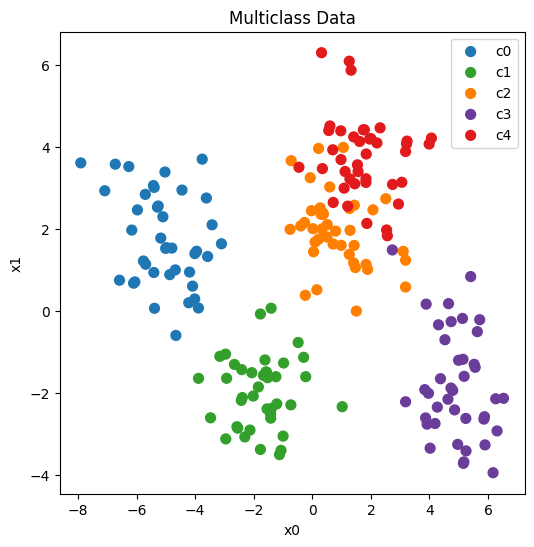

In [116]:
plt_mc(X_train,y_train,classes)

In [101]:
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(5, activation = 'linear', name = "L2")
    ]
)

In [102]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

In [103]:
model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6822  
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1873 
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9047 
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6761 
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5109 
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4230 
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2469 
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1685 
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1109 
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0689 
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0204 
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9628 
Epoch 13/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9062 
Epoch 14/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9357 
Epoch 15/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8804 
Epoch 16/200
7/7 ━

In [ ]:
def plot_cat_decision_boundary_mc(ax, X, predict, vector=True):

    x_min, x_max = X[:, 0].min()- 0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()- 0.5, X[:, 1].max()+0.5
    h = max(x_max-x_min, y_max-y_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]

    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, linewidths=1) 

def plt_cat_mc(X_train, y_train, model, classes):
    model_predict = lambda Xl: np.argmax(model.predict(Xl),axis=1)

    fig,ax = plt.subplots(1,1, figsize=(6,6))
 
    plt_mc_data(ax, X_train,y_train, classes, map=dkcolors_map, legend=True)
    plot_cat_decision_boundary_mc(ax, X_train, model_predict, vector=True)
    ax.set_title("model decision boundary")

    plt.xlabel(r'$x_0$');
    plt.ylabel(r"$x_1$"); 
    plt.show()

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step


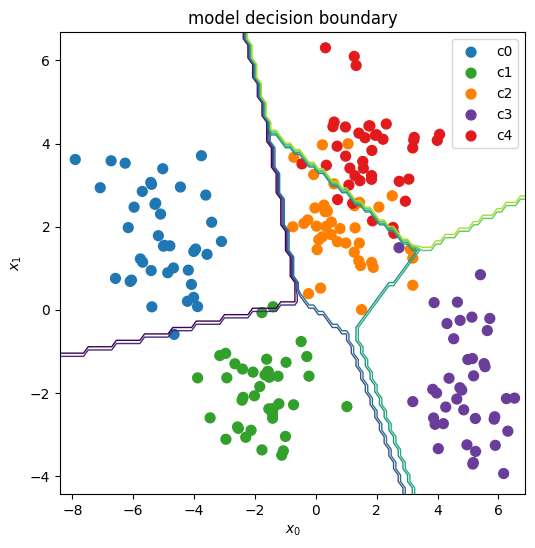

In [112]:
plt_cat_mc(X_train, y_train, model, classes)